In [9]:
import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
from pathlib import Path


import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")


# Set figure parameters
fig_width = 3.25 #ECS spec is 3.25" width
fig_width_2col_inches = 7
fig_width_3col_inches = 10
fig_height = (3/4)*fig_width # standard ratio

rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 7
rcParams['legend.frameon'] = False
rcParams['xtick.bottom'] = False
rcParams['ytick.direction'] = 'in' 



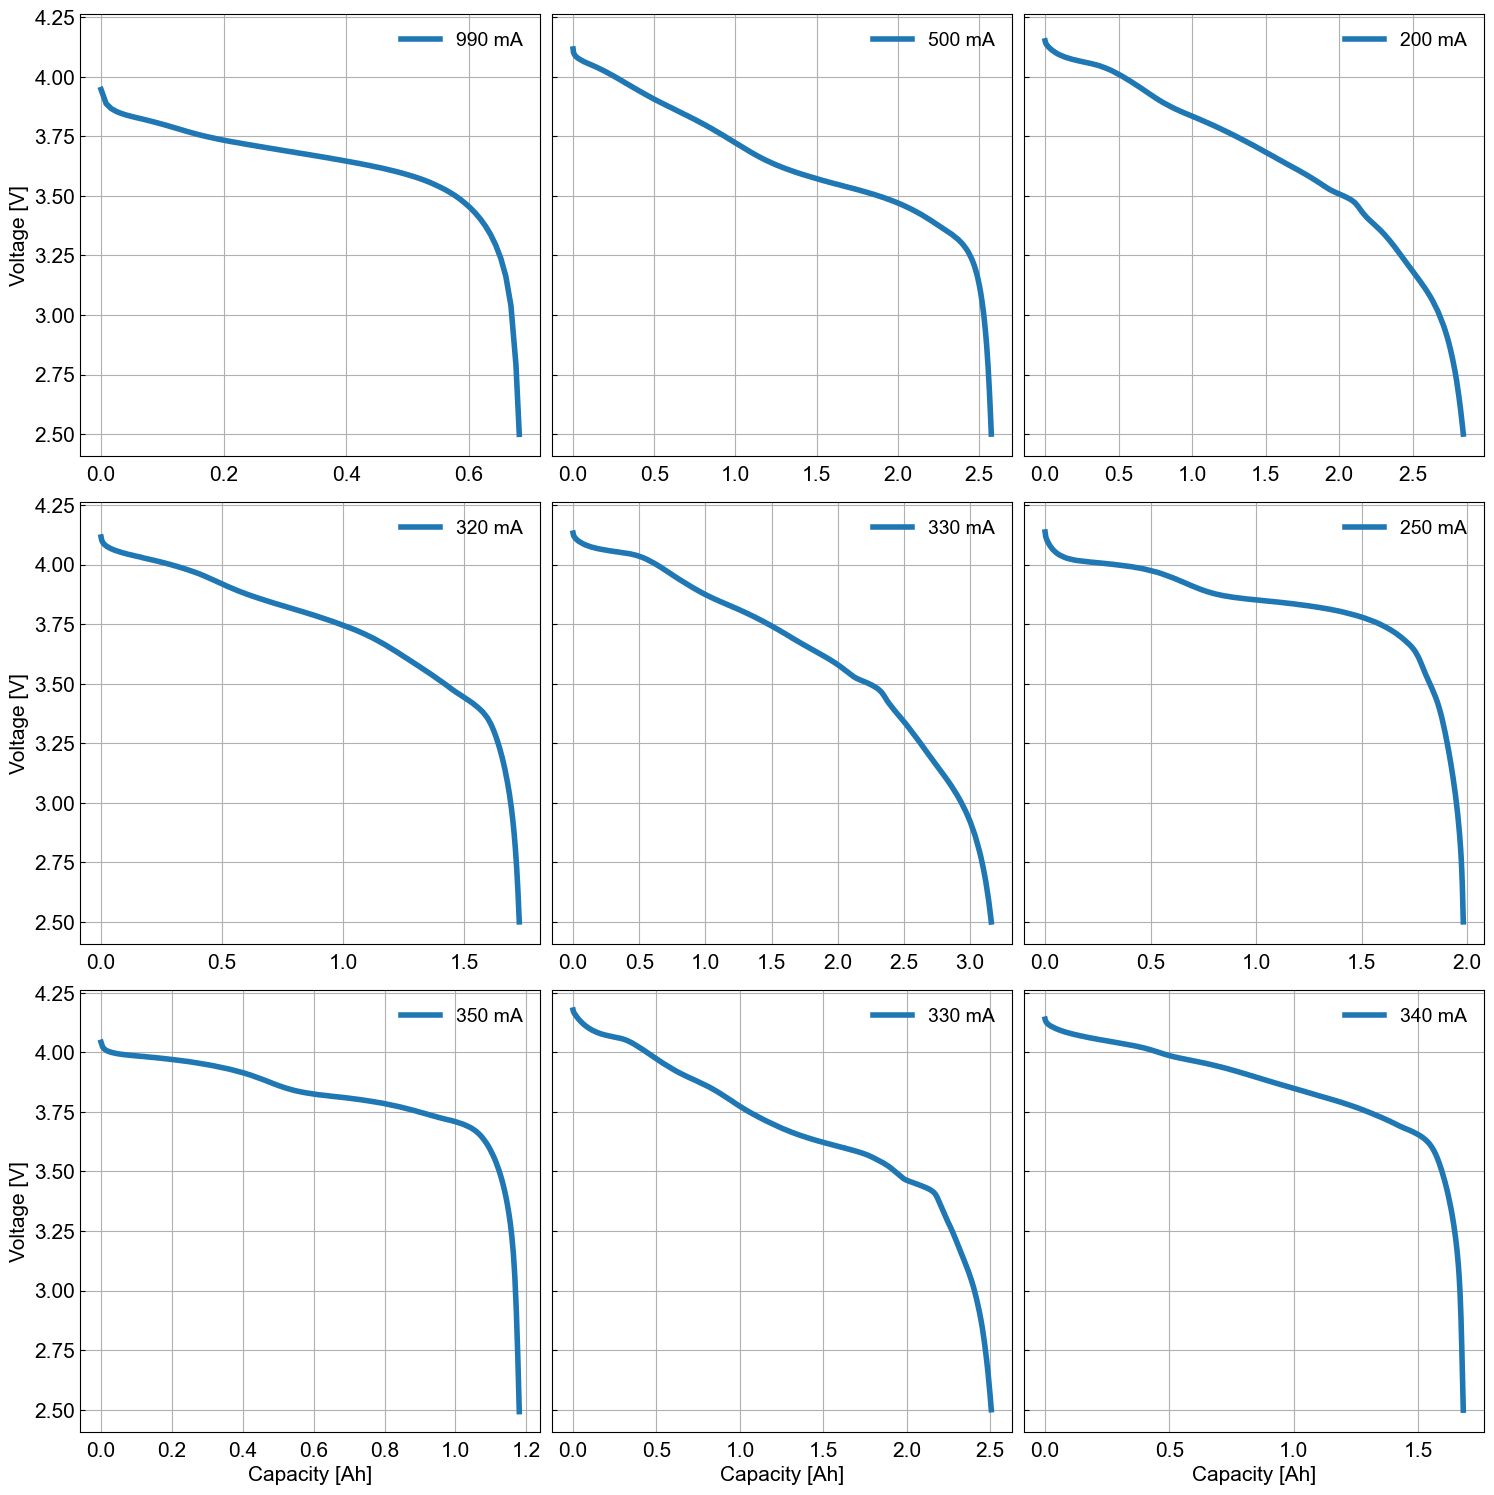

In [15]:
# 현재 작업 중인 디렉토리 경로 가져오기
current_dir = os.getcwd()

# 'Electrochemistry' 폴더 경로 설정
electrochemistry_dir = os.path.join(current_dir, 'Electrochemistry')

# 'Electrochemistry' 폴더 내의 모든 .xlsx 파일을 찾기
xlsx_files = [f for f in os.listdir(electrochemistry_dir) if f.endswith('.xlsx')]

# 데이터 필터링 함수
def filter_data(df, Cycle_index=1, Step_type='CC DChg'):
    filtered_df = df[(df['Cycle Index'] == Cycle_index) & (df['Step Type'] == Step_type)]
    filtered_df.reset_index(drop=True, inplace=True)
    voltage_data = filtered_df['Voltage(V)']
    capacity_data = filtered_df['Capacity(Ah)']
    
    return capacity_data, voltage_data


legend_texts = ['990 mA', '500 mA', '200 mA', '320 mA', '330 mA', '250 mA', '350 mA', '330 mA', '340 mA']


# 서브플롯 설정
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환

# 각 파일에 대해 데이터를 읽고 그래프 그리기
for i, file in enumerate(xlsx_files):
    file_path = os.path.join(electrochemistry_dir, file)
    df = pd.read_excel(file_path, header=0, sheet_name='record')  # 엑셀 파일 읽기
    
    # 데이터 필터링
    capacity_data, voltage_data = filter_data(df)
        
    # 그래프 그리기
    axes[i].plot(capacity_data, voltage_data, label=f'{legend_texts[i]}', linewidth=4)

    axes[i].grid(True)
    axes[i].legend(fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=15)


axes[6].set_xlabel('Capacity [Ah]', fontsize=15)
axes[7].set_xlabel('Capacity [Ah]', fontsize=15)
axes[8].set_xlabel('Capacity [Ah]', fontsize=15)
axes[0].set_ylabel('Voltage [V]', fontsize=15)
axes[3].set_ylabel('Voltage [V]', fontsize=15)
axes[6].set_ylabel('Voltage [V]', fontsize=15)
plt.tight_layout()
plt.show()

/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Wor

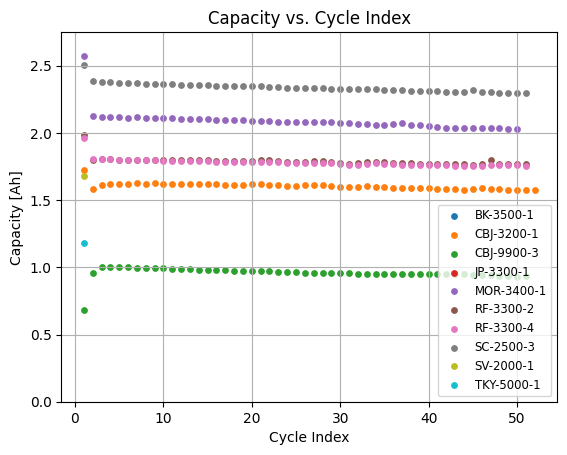

In [24]:

folder_path = os.getcwd()
# 'Electrochemistry' 폴더 경로 설정
electrochemistry_dir = os.path.join(current_dir, 'Electrochemistry')

files = os.listdir(electrochemistry_dir)

excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]
excel_files_sort = sorted(excel_files)

cmap = plt.cm.Reds
norm = plt.Normalize(vmin=0, vmax=50)

def filter_data(df):
    filtered_df = df
    filtered_df = filtered_df[filtered_df['Cycle Index'] > -1]
    filtered_df.reset_index(drop=True, inplace=True)
    Cycle_index = filtered_df['Cycle Index']
    capacity_data = filtered_df['DChg. Cap.(Ah)']
    
    return Cycle_index, capacity_data

for file in excel_files_sort:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path, header=0, sheet_name='cycle')
    
    Cycle_index, capacity_data = filter_data(df)
    
    # Remove the file extension for the label
    label = os.path.splitext(file)[0]
    
    plt.scatter(Cycle_index, capacity_data, s=15, label=label)
    
plt.ylim(0, 2.75)
plt.grid()
plt.xlabel('Cycle Index')
plt.ylabel('Capacity [Ah]')
plt.title('Capacity vs. Cycle Index')
plt.legend(fontsize='small')
plt.show()

/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/jinhong/.pyenv/versions/3.11.9/envs/glimpse_env3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Wor

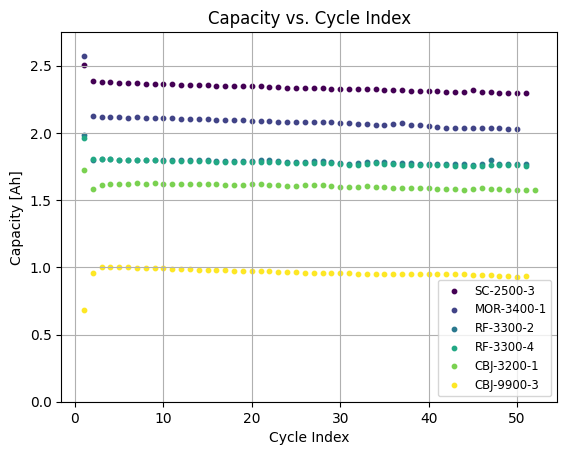

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 현재 작업 디렉토리와 파일 목록 가져오기
folder_path = os.getcwd()
files = os.listdir(folder_path)

# Excel 파일 필터링
excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]
excel_files_sort = sorted(excel_files)

# 데이터 필터링 함수 정의
def filter_data(df):
    filtered_df = df
    filtered_df = filtered_df[filtered_df['Cycle Index'] > -1]
    filtered_df.reset_index(drop=True, inplace=True)
    Cycle_index = filtered_df['Cycle Index']
    capacity_data = filtered_df['DChg. Cap.(Ah)']
    
    return Cycle_index, capacity_data

# 각 파일의 데이터를 저장할 사전 생성
data_dict = {}

# 각 파일의 데이터 읽기 및 필터링
for file in excel_files_sort:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path, header=0, sheet_name='cycle')
    
    Cycle_index, capacity_data = filter_data(df)
    
    # 파일 확장자를 제거하여 레이블 생성
    label = os.path.splitext(file)[0]
    
    data_dict[label] = (Cycle_index, capacity_data)

# 원하는 순서로 레이블 지정 (여기서는 임의의 순서)
sorted_labels = ['SC-2500-3','MOR-3400-1', 'RF-3300-2', 'RF-3300-4', 'CBJ-3200-1', 'CBJ-9900-3']  # 원하는 순서로 레이블 나열

# 컬러맵 설정
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(sorted_labels)))

# 정렬된 레이블을 사용하여 플롯 생성
for idx, label in enumerate(sorted_labels):
    if label in data_dict:
        Cycle_index, capacity_data = data_dict[label]
        color = colors[idx]
        
        # 전체 점 플롯
        plt.scatter(Cycle_index, capacity_data, s=10, color=color, label=label)

# 플롯 설정
plt.ylim(0, 2.75)
plt.grid()
plt.xlabel('Cycle Index')
plt.ylabel('Capacity [Ah]')
plt.title('Capacity vs. Cycle Index')
plt.legend(fontsize='small')
plt.show()

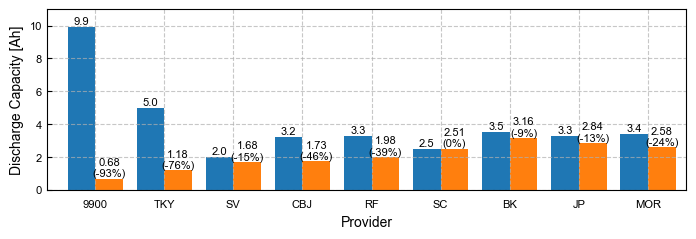

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 현재 작업 중인 디렉토리 경로 가져오기
current_dir = os.getcwd()

# 'Electrochemistry' 폴더 경로 설정
electrochemistry_dir = os.path.join(current_dir, 'Electrochemistry')

# 'Electrochemistry' 폴더 내의 모든 .xlsx 파일을 찾기
file_names = [f for f in os.listdir(electrochemistry_dir) if f.endswith('.xlsx')]
file_names = sorted([f for f in os.listdir(electrochemistry_dir) if f.endswith('.xlsx')])

# Hardcoded values
hardcoded_values = [9.9, 5.0, 2.0, 3.2, 3.3, 2.5, 3.5, 3.3, 3.4]

# List to store the extracted values
extracted_values = []

# Iterate through the files in the specified order
for file_name in file_names:
    file_path = os.path.join(electrochemistry_dir, file_name)
    df = pd.read_excel(file_path, sheet_name='cycle')
    # Filter the rows with Cycle Index 1
    cycle_index_1 = df[df['Cycle Index'] == 1]
    # Extract the DChg. Cap. (Ah) value
    dchg_cap = cycle_index_1['DChg. Cap.(Ah)'].values[0]
    extracted_values.append(dchg_cap)

# Create the bar graph
labels = [os.path.splitext(file_name)[0] for file_name in file_names]  # Use file names as labels
labels = ['9900','TKY','SV','CBJ','RF','SC','BK','JP','MOR']  # Use file names as labels
x = range(len(labels))

fig, ax = plt.subplots(figsize=(fig_width_2col_inches, fig_height))  # Adjust the figsize as necessary

# Plotting the bars
bar_width = 0.4
ax.bar(x, hardcoded_values, width=bar_width, label='Hardcoded Values', align='center')
ax.bar([p + bar_width for p in x], extracted_values, width=bar_width, label='Extracted Values', align='center')

# Adding labels and title
ax.set_ylabel('Discharge Capacity [Ah]', fontsize=10)
ax.set_xlabel('Provider', fontsize=10)
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels, ha='center')

ax.set_ylim(0, 11)
ax.set_xlim(-0.5, 8.75)
# 그리드 켜기
ax.grid(True, linestyle='--', alpha=0.7)

# Adding percentage differences above the bars
for i in range(len(labels)):
    difference = int(((extracted_values[i] - hardcoded_values[i]) / hardcoded_values[i]) * 100)  # 퍼센트를 정수로 변환
    ax.text(i, hardcoded_values[i] + 0.05, f'{hardcoded_values[i]}', ha='center', va='bottom')
    ax.text(i + bar_width, extracted_values[i] + 0.7, f'{extracted_values[i]:.2f}', ha='center', va='bottom')
    ax.text(i + bar_width, extracted_values[i] + 0.6, f'({difference}%)', ha='center', va='top')

# ax.legend()

plt.tight_layout()
plt.show()

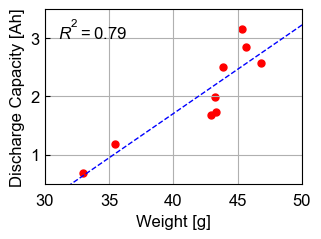

In [65]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# 현재 작업 중인 디렉토리 경로 가져오기
current_dir = os.getcwd()

# 'Electrochemistry' 폴더 경로 설정
electrochemistry_dir = os.path.join(current_dir, 'Electrochemistry')

# 'Electrochemistry' 폴더 내의 모든 .xlsx 파일을 찾기
file_names = sorted([f for f in os.listdir(electrochemistry_dir) if f.endswith('.xlsx')])

# Weight values
weight = [32.9975, 35.5, 42.9025, 43.36, 43.24, 43.9, 45.385, 45.62, 46.8]

# List to store the extracted values
extracted_values = []

# Iterate through the files in the specified order
for file_name in file_names:
    file_path = os.path.join(electrochemistry_dir, file_name)
    df = pd.read_excel(file_path, sheet_name='cycle')
    # Filter the rows with Cycle Index 1
    cycle_index_1 = df[df['Cycle Index'] == 1]
    # Extract the DChg. Cap. (Ah) value
    dchg_cap = cycle_index_1['DChg. Cap.(Ah)'].values[0]
    extracted_values.append(dchg_cap)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(weight, extracted_values)

# Extend the weight range for the regression line
weight_min = min(weight) - 5  # Extend below the minimum weight
weight_max = max(weight) + 5  # Extend above the maximum weight
extended_weight = np.linspace(weight_min, weight_max, 100)

# Calculate the regression line for the extended weight range
regression_line = extended_weight * slope + intercept

# Scatter plot

fig, ax = plt.subplots(figsize=(fig_width, fig_height))  # Adjust the figsize as necessary

ax.scatter(weight, extracted_values, color='red', label='Extracted Values')
ax.plot(extended_weight, regression_line, color='blue', linestyle='--', label=f'Linear Fit: $R^2$ = {r_value**2:.2f}')
r_squared = r_value ** 2
ax.text(0.05, 0.95, r'$R^{2} = %.2f$' % r_squared, transform=ax.transAxes, fontsize=12, verticalalignment='top')

# Adding labels and title
ax.set_xlabel('Weight [g]',fontsize=12)
ax.set_ylabel('Discharge Capacity [Ah]',fontsize=12)
ax.set_xlim(30,50)
ax.set_ylim(0.5,3.5)
ax.tick_params(axis='both', which='major', labelsize=12) 
ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()


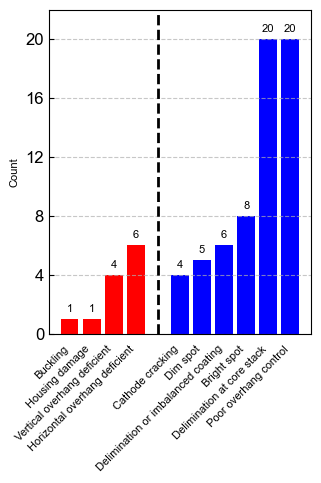

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
# 데이터
# categories = ["Buckling", "Housing\ndamage", "Vertical\noverhang\ndeficient", 
#               "Horizontal\noverhang\ndeficient", "Cathode\ncracking", "Dim spot", 
#               "Delimination\nor imbalanced\ncoating", "Bright spot", 
#               "Delimination\nat core stack", "Poor\noverhang\ncontrol"]
categories = ["Buckling", "Housing damage", "Vertical overhang deficient", 
              "Horizontal overhang deficient", "Cathode cracking", "Dim spot", 
              "Delimination or imbalanced coating", "Bright spot", 
              "Delimination at core stack", "Poor overhang control"]

values = [1, 1, 4, 6, 4, 5, 6, 8, 20, 20]

# x 위치 조정 (간격 추가)
x1 = np.arange(len(categories[:4]))
x2 = np.arange(len(categories[4:])) + len(x1) + 1  # 빨간 막대 뒤에 간격 추가

# 막대그래프 그리기
fig, ax = plt.subplots(figsize=(fig_width, fig_height*2))

# 빨간색 막대 (Horizontal overhang deficient 까지)
ax.bar(x1, values[:4], color='red', label='Group 1')

# 파란색 막대 (Cathode cracking 이후)
ax.bar(x2, values[4:], color='blue', label='Group 2')

# 구분선 그리기 (점선, 두께를 2로 설정)
ax.axvline(x=len(x1), color='black', linestyle='--', linewidth=2)

# 레이블 및 제목 추가
ax.set_ylabel('Count')

# x축 레이블 설정 (각 x위치에 대응하는 카테고리명)
x_labels = np.concatenate((x1, x2))
ax.set_xticks(x_labels)
ax.set_ylim(0,22)
ax.tick_params(axis='y', which='major', labelsize=12) 
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MultipleLocator(4))
ax.set_xticklabels(categories, rotation=45, ha='right')

# y축만 그리드 표시
ax.grid(True, axis='y', linestyle='--', alpha=0.7)


# 값 표시
for i, v in enumerate(values):
    if i < len(x1):
        ax.text(x1[i], v + 0.5, str(v), color='black', ha='center')
    else:
        ax.text(x2[i - len(x1)], v + 0.5, str(v), color='black', ha='center')

plt.tight_layout()
plt.show()